In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.axes as axes

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


In [2]:
data = pd.read_csv('./data/dataset.csv', sep=',')
# data = data.dropna()

In [3]:
data


,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,Class
0,-36.132130,56.834931,336.805602,312.783486,243.772154,219.775145,231.795973,217.838130,225.905088,234.000292,...,122.945324,87.832903,95.705976,103.563813,126.405674,134.230808,213.038452,161.827829,169.598140,A3
1,-34.731816,55.859034,235.453354,365.054607,361.666235,338.291641,366.934193,360.597227,337.284037,350.997888,...,148.021119,50.484428,99.940320,108.388121,116.827151,53.256715,61.676110,155.084625,163.481545,A1
2,-4.365399,-22.280088,201.805660,177.894505,153.989090,138.092039,167.205959,143.333447,287.477079,84.639420,...,71.229834,116.156831,125.062429,133.945878,49.806418,58.643277,103.455674,112.242826,66.003937,A3
3,-13.959523,-17.422078,43.116762,122.660131,98.211160,206.772968,112.348664,157.941335,258.554057,295.189893,...,128.143884,130.306724,76.443916,84.555112,92.639955,77.698081,85.729115,92.732675,100.708370,A3
4,-45.439545,292.208040,443.860164,531.521337,503.196026,465.888643,409.603551,409.345064,425.117459,532.924968,...,132.064656,187.863569,196.642955,150.402057,133.140097,141.856281,226.549802,235.219842,195.865555,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,-26.078524,25.436378,0.953886,128.476602,163.007128,188.548055,159.101955,202.671384,212.258879,187.866961,...,105.782881,105.171453,126.539672,140.886598,164.211280,161.512752,208.790032,171.042121,38.268000,A3
3199,8.579503,-4.190967,-29.961438,38.268508,174.502282,153.743291,180.994925,150.260558,129.543547,134.847231,...,65.031799,87.976609,113.907747,122.824446,131.725924,140.611389,127.480037,136.331046,101.163586,A1
3200,126.168852,109.256070,166.343276,171.430446,120.517539,125.604499,179.691256,179.777727,334.863814,311.949398,...,132.931289,148.668800,157.397841,186.117718,149.827717,154.527108,122.215146,78.891069,87.554104,A4
3201,-0.530938,20.716761,1.964512,-13.787632,147.460378,128.709972,130.962561,112.219548,157.482319,138.752250,...,83.437925,55.405568,62.364340,141.313661,148.252941,100.181578,107.098954,104.004443,128.897406,A1


In [5]:
print(data.shape)

(3203, 801)


In [4]:
import torch

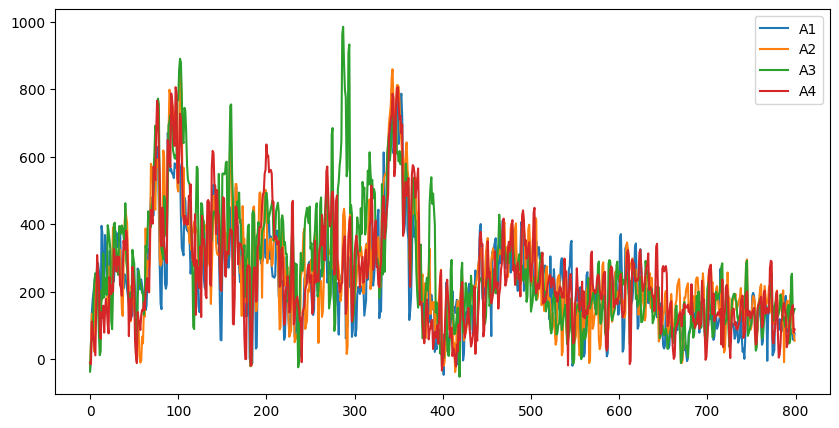

In [5]:
def plot_data(ax : axes.Axes, fontsize=12, hide_labels=False, data = [], title = ''):
    x = np.arange(len(data))
    y = data
    ax.plot(x, y)
    ax.set_ylim(top= 1000)

    ax.locator_params(nbins=3)
    if hide_labels:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    else:
        # ax.set_xlabel('x-label', fontsize=fontsize)
        # ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title(title, fontsize=fontsize)

# fig, axs = plt.subplots(2, 2, layout=None, figsize=(10, 10))

# for classe, ax in zip(['A1', 'A2', 'A3', 'A4'], axs.flat):
#     selected_data = data[data.Class == classe ]
#     nb_data = selected_data.shape[0]
#     it = random.randint(0, nb_data)
#     serie = selected_data.iloc[it, :-1].to_numpy().tolist()
#     classe = selected_data.iloc[it, -1]
#     plot_data(ax= ax,data= serie,title= classe)

plt.figure(figsize=(10, 5))
for classe in ['A1', 'A2', 'A3', 'A4']:
    selected_data = data[data.Class == classe ]
    nb_data = selected_data.shape[0]
    it = random.randint(0, nb_data)
    serie = selected_data.iloc[it, :-1].to_numpy().tolist()
    classe = selected_data.iloc[it, -1]
    plt.plot(serie, label=classe)

plt.legend()

{'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3}


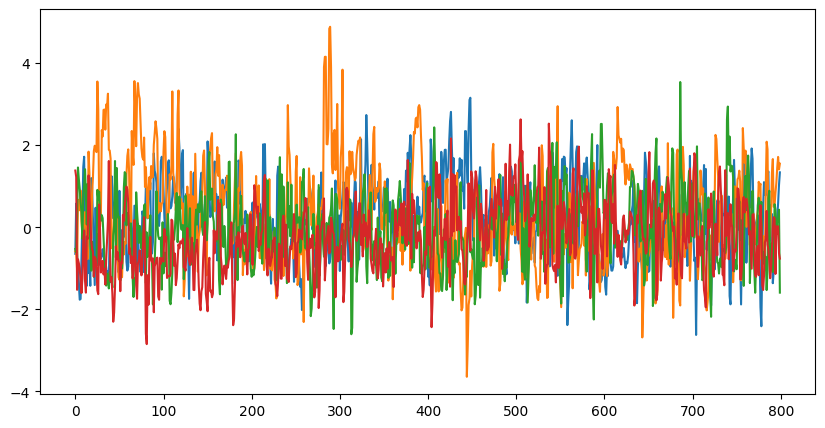

In [6]:
from sklearn.preprocessing import StandardScaler


x_train = []
y_train = []

x_test = []
y_test = []


classes = ['A1', 'A2', 'A3', 'A4']

classes_to_id = { k : i for i, k in enumerate(classes)}

print(classes_to_id)

for i in range(data.shape[0]):
    
    spectra = data.iloc[i, :-1].to_numpy().astype(np.float64)
    #print(spectra.dtype)
    if np.isnan(spectra).any():
        pass
        #plt.figure()
        #plt.plot(spectra)
        #print(np.count_nonzero(np.isnan(spectra)))
    else:
        if random.random() < 0.8:
            x_train.append(spectra.tolist())
            classe = data.iloc[i, -1]
            y_train.append(classes_to_id[classe])
        else:
            x_test.append(spectra.tolist())
            classe = data.iloc[i, -1]
            y_test.append(classes_to_id[classe])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


plt.figure(figsize=(10, 5))
for classe in [0, 1, 2, 3]:
    selected_data = x_train_scaled[y_train == classe]
    nb_data = selected_data.shape[0]
    it = random.randint(0, nb_data)
    serie = selected_data[it, :]
    plt.plot(serie, label=classe)